# Import all the datasets

In [169]:
import pandas as pd

places_df = pd.read_csv('tourism_with_id.csv')
users_df = pd.read_csv('user.csv')
ratings_df = pd.read_csv('tourism_rating.csv')

# Display dataframes created 

In [170]:
places_df.head(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [171]:
users_df.head(2)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21


In [172]:
ratings_df.head(3)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5


# Preliminary inspection

In [173]:
print(places_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB
None


In [174]:
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB
None


In [175]:
print(ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB
None


# Check for nulls and duplicates

In [176]:
print(places_df.isnull().sum())
print(users_df.isnull().sum())
print(ratings_df.isnull().sum())

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64
User_Id     0
Location    0
Age         0
dtype: int64
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


In [177]:
print(places_df.duplicated().sum())
print(users_df.duplicated().sum())
print(ratings_df.duplicated().sum())

0
0
79


# 1b. Remove any anomalies found in the data 

In [178]:
places_df.drop(columns=['Time_Minutes', 'Unnamed: 11','Unnamed: 12','Coordinate','Lat','Long'],inplace=True)

In [179]:
places_df

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6


Explore the data in depth to understand the tourism patterns. 
a. Explore the user group that provides the tourism ratings by answering the following questions:
i. The age distribution of users visiting the places and giving the ratings.
ii. Where are most of these users (tourists) coming from?


In [180]:
users_df['Age']

0      20
1      21
2      23
3      21
4      20
       ..
295    31
296    39
297    38
298    27
299    26
Name: Age, Length: 300, dtype: int64

In [181]:
users_df['Location']

0            Semarang, Jawa Tengah
1               Bekasi, Jawa Barat
2              Cirebon, Jawa Barat
3               Bekasi, Jawa Barat
4        Lampung, Sumatera Selatan
                  ...             
295      Lampung, Sumatera Selatan
296    Palembang, Sumatera Selatan
297              Bogor, Jawa Barat
298            Sragen, Jawa Tengah
299           Ponorogo, Jawa Timur
Name: Location, Length: 300, dtype: object

Text(0.5, 1.0, 'Age Distribution of Tourists')

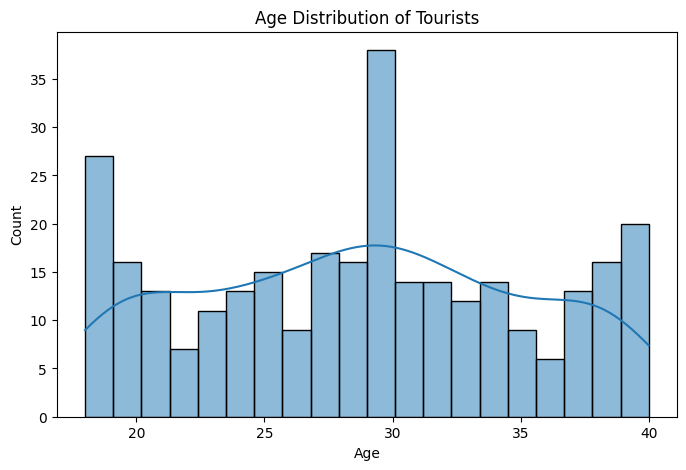

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(users_df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Tourists')

In [183]:
print(users_df['Age'].mode())

0    30
Name: Age, dtype: int64


In [184]:
print(users_df['Age'].mean())

28.7


In [185]:
users_df['Location'].value_counts()

Location
Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Lampung, Sumatera Selatan       20
Yogyakarta, DIY                 20
Bogor, Jawa Barat               17
Cirebon, Jawa Barat             14
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Jakarta Utara, DKI Jakarta      10
Surabaya, Jawa Timur            10
Jakarta Pusat, DKI Jakarta      10
Sragen, Jawa Tengah              9
Serang, Banten                   9
Bandung, Jawa Barat              8
Karawang, Jawa Barat             8
Kota Gede, DIY                   8
Tanggerang, Banten               8
Jakarta Timur, DKI Jakarta       6
Jakarta Barat, DKI Jakarta       6
Palembang, Sumatera Selatan      5
Solo, Jawa Tengah                4
Klaten, Jawa Tengah              4
Cilacap, Jawa Tengah             4
Purwakarat, Jawa Barat           4
Nganjuk, Jawa Timur              2
Madura, Jawa Timur               2
Name: count

Text(0.5, 1.0, 'Where most of the tourists are from')

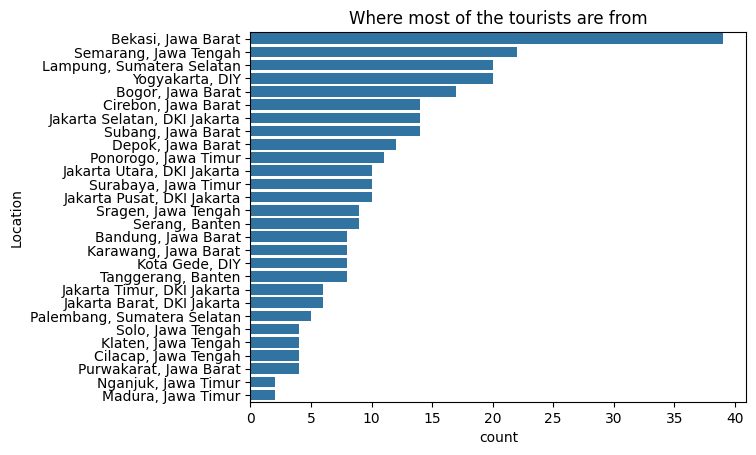

In [186]:
sns.countplot(data=users_df, y='Location', order=users_df['Location'].value_counts().index)
plt.title('Where most of the tourists are from')

b. Explore the locations and categories of tourist spots by answering the following questions:
i. What are the different categories of tourist spots?


In [187]:
print(places_df['Category'].value_counts())

Category
Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of Places by Category')

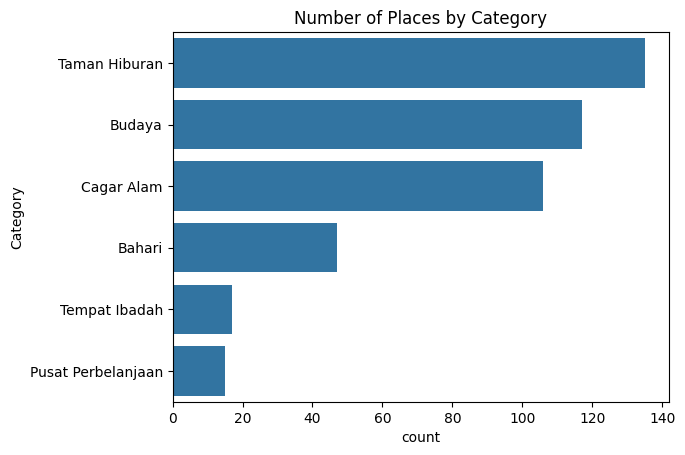

In [188]:
sns.countplot(data=places_df, y='Category', order=places_df['Category'].value_counts().index)
plt.title('Number of Places by Category')

ii. What kind of tourism is each city or location most famous or suitable for?

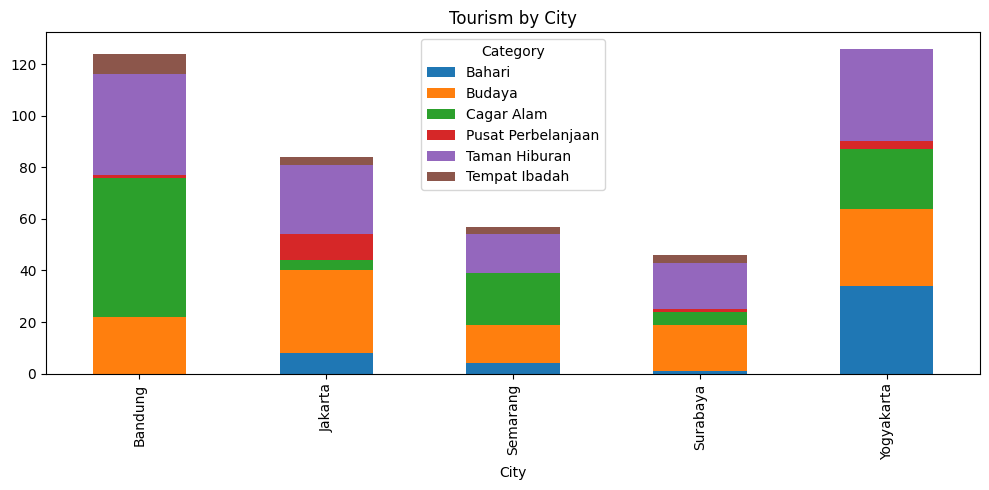

In [189]:
pd.crosstab(places_df['City'], places_df['Category']).plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5)
)
plt.title('Tourism by City')
plt.tight_layout()
plt.show()


In [190]:
category_counts = pd.crosstab(places_df['City'], places_df['Category'])
print(category_counts)

Category    Bahari  Budaya  Cagar Alam  Pusat Perbelanjaan  Taman Hiburan  \
City                                                                        
Bandung          0      22          54                   1             39   
Jakarta          8      32           4                  10             27   
Semarang         4      15          20                   0             15   
Surabaya         1      18           5                   1             18   
Yogyakarta      34      30          23                   3             36   

Category    Tempat Ibadah  
City                       
Bandung                 8  
Jakarta                 3  
Semarang                3  
Surabaya                3  
Yogyakarta              0  


iii. Which city would be best for a nature enthusiast to visit?

In [191]:
nature_spots = places_df[places_df['Category'].str.contains('Cagar Alam')]
print(nature_spots['City'].value_counts())

City
Bandung       54
Yogyakarta    23
Semarang      20
Surabaya       5
Jakarta        4
Name: count, dtype: int64


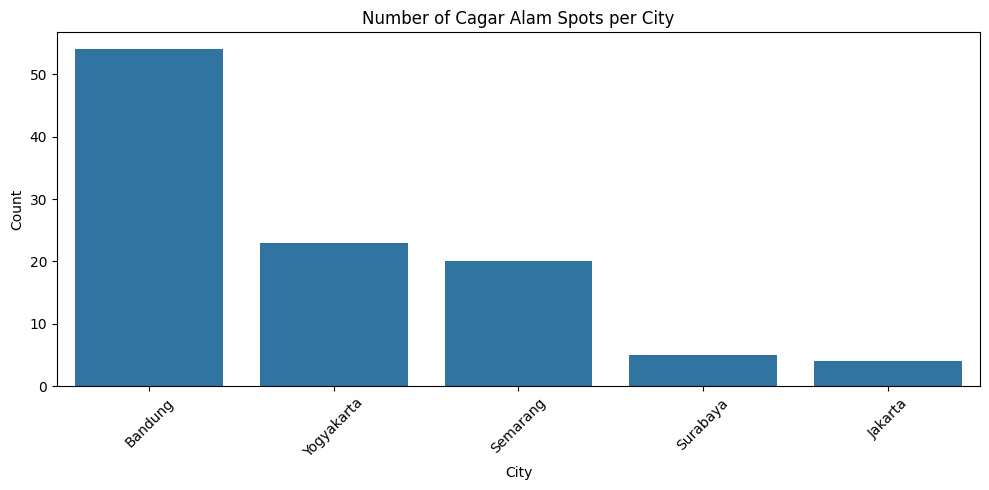

In [192]:
plt.figure(figsize=(10, 5))
sns.countplot(data=nature_spots, x='City', order=nature_spots['City'].value_counts().index)
plt.title('Number of Cagar Alam Spots per City')
plt.ylabel('Count')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


iv. What is the average price or cost of these places?

In [193]:
city_prices = places_df.groupby('City')['Price'].mean().sort_values()

In [194]:
city_prices

City
Surabaya      10195.652174
Semarang      17017.543860
Yogyakarta    19456.349206
Bandung       24931.451613
Jakarta       45130.952381
Name: Price, dtype: float64

<Axes: xlabel='City'>

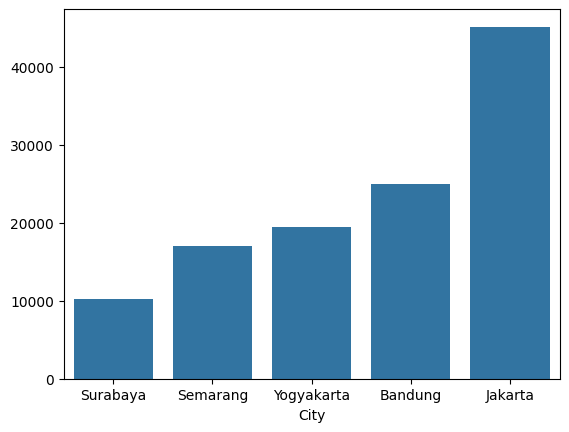

In [195]:
sns.barplot(x=city_prices.index,y=city_prices.values)

c. Create combined data with places and their user ratings.


In [196]:
ratings_df.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [197]:
places_df

,Place_Id,Place_Name,Description,Category,City,Price,Rating
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6


In [198]:
merged_df = ratings_df.merge(places_df, on='Place_Id')
merged_df

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8


d. Use this data to figure out the spots that the tourists most love. Which city has the most loved tourist spots?


In [199]:
top_places = merged_df.groupby(['Place_Name'])['Rating'].mean().sort_values(ascending=False).head(10)
print(top_places)

Place_Name
Wisata Kuliner Pecenongan               5.0
Desa Wisata Sungai Code Jogja Kota      5.0
Freedom Library                         5.0
Kauman Pakualaman Yogyakarta            5.0
Masjid Daarut Tauhiid Bandung           4.9
Masjid Nasional Al-Akbar                4.9
Kebun Tanaman Obat Sari Alam            4.9
Gereja Tiberias Indonesia Bandung       4.9
Pulau Pelangi                           4.8
Gereja Katedral Santo Petrus Bandung    4.8
Name: Rating, dtype: float64


In [200]:
most_loved_city = merged_df.groupby('City')['Rating'].mean().sort_values(ascending=False).head(10)

In [201]:
most_loved_city

City
Jakarta       4.491302
Yogyakarta    4.466040
Surabaya      4.454190
Bandung       4.426742
Semarang      4.369021
Name: Rating, dtype: float64

In [202]:
most_loved_cat = merged_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

In [203]:
most_loved_cat

Category
Tempat Ibadah         4.715844
Budaya                4.523034
Pusat Perbelanjaan    4.457662
Cagar Alam            4.404058
Taman Hiburan         4.401965
Bahari                4.369694
Name: Rating, dtype: float64

3. Build a Recommendation model for the tourists.
a.  Use the above data to develop a collaborative filtering model for recommendation. 
Use that to recommend other places using the current tourist location (place name).


In [204]:
merged_df.head(10)

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Bahari,Semarang,3000,4.1
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0
5,1,312,2,Taman Hutan Raya Ir. H. Juanda,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Cagar Alam,Bandung,11000,4.5
6,1,258,5,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6
7,1,20,4,Museum Taman Prasasti,Museum Taman Prasasti adalah sebuah museum cag...,Budaya,Jakarta,2000,4.5
8,1,154,2,Pantai Ngrawe (Mesra),Kabupaten Gunungkidul jadi salah satu wilayah ...,Bahari,Yogyakarta,10000,4.5
9,1,393,5,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4


In [205]:
from sklearn.metrics.pairwise import cosine_similarity

# Create User-Item matrix
user_item_matrix = merged_df.pivot_table(index='User_Id', columns='Place_Name', values='Rating')

user_item_matrix.head(5)

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.3,NaN,NaN,NaN,NaN,4.3,NaN,4.7
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
user_item_matrix_filled = user_item_matrix.fillna(user_item_matrix.mean())

user_item_matrix_filled.head(5)

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,4.4,4.1,4.5,4.4,4.4,4.3,4.6,4.6,4.6,4.5,...,4.1,4.4,4.3,4.4,4.1,4.7,5.0,4.3,4.3,4.7
2,4.4,4.1,4.5,4.4,4.4,4.3,4.6,4.6,4.6,4.5,...,4.1,4.4,4.3,4.4,4.1,4.7,5.0,4.3,4.3,4.7
3,4.4,4.1,4.5,4.4,4.4,4.3,4.6,4.6,4.6,4.5,...,4.1,4.4,4.3,4.4,4.1,4.7,5.0,4.3,4.3,4.7
4,4.4,4.1,4.5,4.4,4.4,4.3,4.6,4.6,4.6,4.5,...,4.1,4.4,4.3,4.4,4.1,4.7,5.0,4.3,4.3,4.7
5,4.4,4.1,4.5,4.4,4.4,4.3,4.6,4.6,4.6,4.5,...,4.1,4.4,4.3,4.4,4.1,4.7,5.0,4.3,4.3,4.7


Item Comparison for Item-Based


In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

user_item_matrix_scaled = pd.DataFrame(scaler.fit_transform(user_item_matrix_filled.T).T,columns=user_item_matrix_filled.columns)

In [208]:
# Compute cosine similarity between items (places)
item_similarity = cosine_similarity(user_item_matrix_scaled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

In [209]:
item_similarity_df.head(10)

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
Place_Name,,,,,,,,,,,,,,,,,,,,,
Air Mancur Menari,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Air Terjun Kali Pancur,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Air Terjun Kedung Pedut,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Air Terjun Semirang,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Air Terjun Sri Gethuk,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Alive Museum Ancol,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0
Alun Alun Selatan Yogyakarta,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Alun-Alun Kota Bandung,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
Alun-alun Utara Keraton Yogyakarta,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0


Item-Based (location based)

In [210]:
def get_similar_places(Place_Name, top_n=5):

    Place_Name = Place_Name.strip().title()
    
    if Place_Name not in item_similarity_df.columns:
        return "Place not found."
    
    # Get the similarity scores
    similar_scores = item_similarity_df[Place_Name].sort_values(ascending=False)
    
    # Exclude the place itself
    similar_scores = similar_scores.drop(Place_Name)
    
    # Get top N similar places
    top_places = similar_scores.head(top_n)

    recommendations = []
    for place, score in top_places.items():
        location = merged_df.loc[merged_df['Place_Name'] == place, 'City'].values
        location = location[0] if len(location) > 0 else "Unknown"
        recommendations.append((place, score, location))
    
    # Create a DataFrame
    rec_df = pd.DataFrame(recommendations, columns=['Place_Name', 'Similarity_Score', 'Location'])

    return rec_df

# Prompt user
user_input = input("\nEnter the name of a destination you're interested in: ")
results = get_similar_places(user_input)

# Show results
if isinstance(results, list):
    print("\nYou might also enjoy visiting:")
    for name, score, location in results:
        print(f"- {name} (Similarity: {score:.2f}, Location: {location})")
else:
    print(f"\n{results}")



                              Place_Name  Similarity_Score    Location
0              Wisata Kuliner Pecenongan               1.0     Jakarta
1                               Wot Batu               1.0     Bandung
2                          Curug Aseupan               1.0     Bandung
3  Puncak Gunung Api Purba - Nglanggeran               1.0  Yogyakarta
4                  Perpustakaan Nasional               1.0     Jakarta
